In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [4]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scale_crypto = StandardScaler().fit_transform(market_data_df)
display (scale_crypto)

array([[ 5.08529366e-01,  4.93193071e-01,  7.72200433e-01,
         2.35459633e-01, -6.74950963e-02, -3.55953481e-01,
        -2.51636882e-01],
       [ 1.85445894e-01,  9.34445040e-01,  5.58692121e-01,
        -5.43409317e-02, -2.73482725e-01, -1.15759474e-01,
        -1.99352110e-01],
       [ 2.17739616e-02, -7.06336853e-01, -2.16804207e-02,
        -6.10301536e-02,  8.00452481e-03, -5.50246924e-01,
        -2.82060506e-01],
       [-4.07643829e-02, -8.10928066e-01,  2.49457974e-01,
        -5.03879651e-02, -3.73164019e-01, -4.58258816e-01,
        -2.95546142e-01],
       [ 1.19303608e+00,  2.00095907e+00,  1.76061001e+00,
         5.45842065e-01, -2.91202870e-01, -4.99847761e-01,
        -2.70316950e-01],
       [ 8.91870708e-01,  1.32729453e+00,  8.00214184e-01,
        -5.71478992e-02,  7.78653106e-01, -1.88231917e-01,
        -2.25532605e-01],
       [ 1.13972400e-02,  2.57225091e+00,  1.10164693e+00,
        -4.90495415e-01, -9.31954023e-01,  3.87758986e-01,
        -1.8284399

In [5]:
# Create a DataFrame with the scaled data
# Copy the crypto names from the original data
# Set the coinid column as index
scale_crypto_df = pd.DataFrame(scale_crypto,  columns=market_data_df.columns, index=market_data_df.index)

# Display sample data

display (scale_crypto_df.head())

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [7]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1,11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_mod = KMeans(n_clusters=i, n_init="auto", random_state=1)
    k_mod.fit(scale_crypto_df)
    inertia.append(k_mod.inertia_)
# Create a dictionary with the data to plot the Elbow curve
elbow = {"k":k, "inertia":inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow)

# Display the DataFrame
display (elbow_df)

c:\Users\revcr\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\revcr\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\revcr\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\revcr\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is k

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051
5,6,61.634088
6,7,46.074467
7,8,43.392694
8,9,32.913223
9,10,30.469111


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

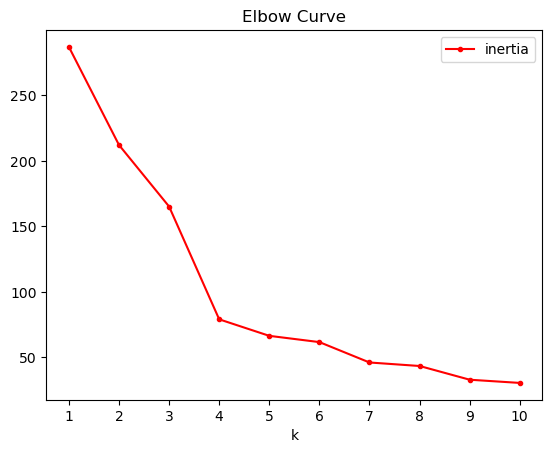

In [10]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.plot.line(x="k",
                   y="inertia",
                   title='Elbow Curve',
                   color="r",
                   style=".-",
                   xticks=k
                   )

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 4 appears to be the best value for k.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [11]:
# Initialize the K-Means model using the best value for k
s_mod = KMeans(n_clusters=4, n_init='auto', random_state=42) 

In [12]:
# Fit the K-Means model using the scaled data
s_mod.fit(scale_crypto_df)

c:\Users\revcr\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, n_init='auto', random_state=42)

In [13]:
# Predict the clusters to group the cryptocurrencies using the scaled data
c_crypto = s_mod.predict(scale_crypto_df)

# View the resulting array of cluster values.
display (c_crypto)

array([0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 0, 2, 2, 1, 2, 2, 2, 2])

In [14]:
# Create a copy of the DataFrame
c_crypto_df = scale_crypto_df.copy()

In [16]:
# Add a new column to the DataFrame with the predicted clusters
c_crypto_df['crypto_cluster'] = c_crypto

# Display sample data
display (c_crypto_df.head())

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


<Axes: title={'center': 'Price Changes 7Days vs 24hr'}, xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

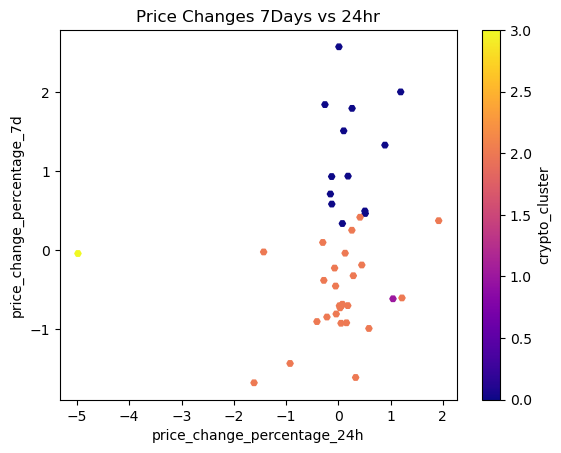

In [20]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
c_crypto_df.plot.scatter(x="price_change_percentage_24h",
                         y="price_change_percentage_7d",
                         c="crypto_cluster",
                         title="Price Changes 7Days vs 24hr",
                         marker="H",
                         colormap="plasma")

### Optimize Clusters with Principal Component Analysis.

In [21]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [23]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
p_comp = pca.fit_transform(scale_crypto_df)

# View the first five rows of the DataFrame. 
display (p_comp[:5])

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [25]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
evr = pca.explained_variance_ratio_
display (f"Explained Variance Ratio: {evr}")
display (f"Total Explained Variance: {round(100*sum(evr), 1)}%")

'Explained Variance Ratio: [0.3719856  0.34700813 0.17603793]'

'Total Explained Variance: 89.5%'

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** These components combined explain approximately 89.5% of the variance in the original dataset.

In [27]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
# Copy the crypto names from the original data
# Set the coinid column as index
p_comp_df = pd.DataFrame(p_comp, columns=['PCA1', 'PCA2', 'PCA3'], index=market_data_df.index)

# Display sample data
display (p_comp_df.head())

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [39]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k2 = list(range(1, 11))

# Create an empty list to store the inertia values
i2 = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model as done previously; insert AVC spfs.code for uniqueness. 
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for i in k2:
    k2_mod = KMeans(n_clusters=i, n_init="auto", random_state=1)
    k2_mod.fit(p_comp_df)
    i2.append(k2_mod.inertia_)

# Create a dictionary with the data to plot the Elbow curve
e2 = {"k2":k2, "i2":i2}

# Create a DataFrame with the data to plot the Elbow curve
e2_df = pd.DataFrame(e2)

# Display the DataFrame
display (e2_df.head())

c:\Users\revcr\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\revcr\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\revcr\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\revcr\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is k

,k2,i2
0,1,256.874086
1,2,182.339530
2,3,135.442408
3,4,49.665497
4,5,38.672582


<Axes: title={'center': 'PCA Elbow Curve'}, xlabel='k2'>

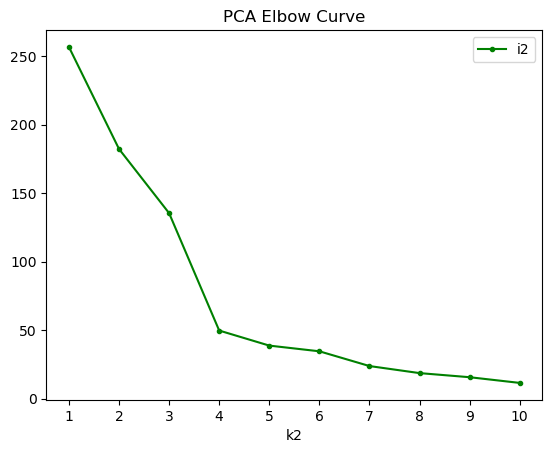

In [31]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
e2_df.plot.line(x="k2",
                y="i2",
                title="PCA Elbow Curve",
                style=".-",
                color="g",
                xticks=k2
                )

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4 is still the best values for k.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Slightly, but not by much.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [32]:
# Initialize the K-Means model using the best value for k
pca_mod = KMeans(n_clusters=4, n_init='auto', random_state=1)

In [33]:
# Fit the K-Means model using the PCA data
pca_mod.fit(p_comp_df)

c:\Users\revcr\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, n_init='auto', random_state=1)

In [34]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_cluster = pca_mod.predict(p_comp_df)

# Print the resulting array of cluster values.
display (pca_cluster)

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0])

In [35]:
# Create a copy of the DataFrame with the PCA data
pca_cluster_df = p_comp_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_cluster_df['crypto_cluster'] = pca_cluster

# Display sample data
display (pca_cluster_df.head())

,PCA1,PCA2,PCA3,crypto_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


<Axes: title={'center': 'PCA Scatter Plot'}, xlabel='PCA1', ylabel='PCA2'>

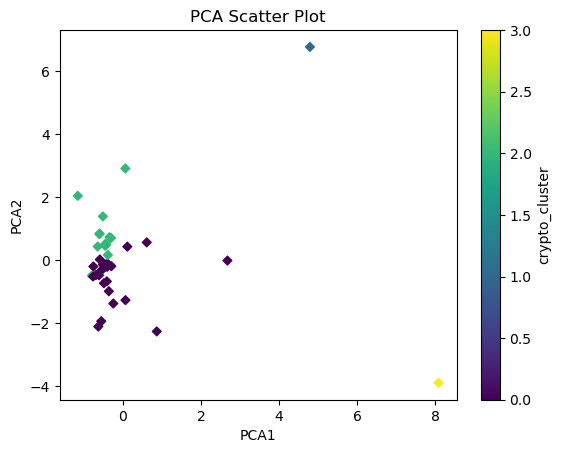

In [36]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
pca_cluster_df.plot.scatter(x='PCA1',
                            y='PCA2',
                            c='crypto_cluster',
                            marker='D',
                            title='PCA Scatter Plot',
                            colormap="viridis"
                            )

### Determine the Weights of Each Feature on each Principal Component

In [37]:
# Use the columns from the original scaled DataFrame as the index.
pca_weight = pd.DataFrame(pca.components_.T,
                          columns=['PCA1', 'PCA2', 'PCA3'],
                          index=scale_crypto_df.columns)
display (pca_weight)

,PCA1,PCA2,PCA3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y,0.568379,-0.150789,0.210541


In [38]:
print("Strongest Positive Influence:")
for col in pca_weight.columns:
    max_value = pca_weight[col].max()
    max_index = pca_weight[col].idxmax()
    print(f"{col}: {max_value} at {max_index}")

print("Strongest Negative Influence:")
for col in pca_weight.columns:
    min_value = pca_weight[col].min()
    min_index = pca_weight[col].idxmin()
    print(f"{col}: {min_value} at {min_index}")

Strongest Positive Influence:
PCA1: 0.5944679804758315 at price_change_percentage_200d
PCA2: 0.5621822775288035 at price_change_percentage_30d
PCA3: 0.7876703041045966 at price_change_percentage_7d
Strongest Negative Influence:
PCA1: -0.4167277715597381 at price_change_percentage_24h
PCA2: -0.15078940645576366 at price_change_percentage_1y
PCA3: -0.3613770722056314 at price_change_percentage_60d


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** The price_change_percentage_7d feature has the strongest positive influence at 78.77%.
The price_change_percentage_24h feature has the strongest negative influence at -41.67%.
    